# Requirements

In [4]:
import pandas as pd
import numpy as np
import json

import language_tool_python

# Clean data of grammar mistakes

In [5]:
# load data
data = pd.read_csv('../raw_data/train.csv')

texts = data.loc[:, "full_text"].values
scores = data.loc[:, "phraseology"].values

In [9]:
analyze_scores = (scores*2-2).astype(int)
b = np.zeros((analyze_scores.shape[0], analyze_scores.max() + 1))
b[np.arange(analyze_scores.shape[0]), analyze_scores] = 1

analyze_scores = np.sum(b, axis=0).astype(int)

print(analyze_scores)

[  10   11  350  772 1153  929  553  108   25]


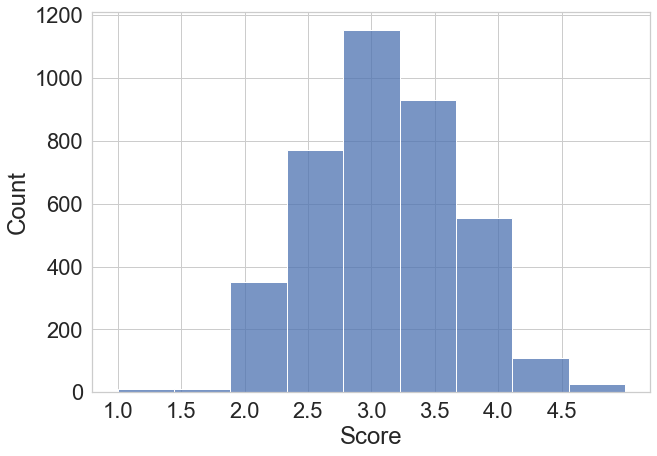

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(
    style="whitegrid", 
    font_scale = 2, 
    rc={'figure.figsize':(10,7)}
)

scores_plot = pd.DataFrame(
    {
        "Score": scores
    }
)

g = sns.histplot(data=scores_plot, x="Score", bins=9)
g.set_xticks(np.arange(1.0, 5.5, 0.5))
# plt.xticks(np.arange(1.0, 5.0, 0.5))
# plt.xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# clear grammar errors - takes time
tool = language_tool_python.LanguageTool('en-US')

clear_texts = texts.copy()
for i in range(texts.shape[0]):
    clear_texts[i] = tool.correct(texts[i])

In [40]:
# remove '.' and ',' symbols, cast to lowercase, split into words

data = []
for i in range(clear_texts.shape[0]):
    # data.extend(np.array([clear_texts[i].replace('.', '').replace(',', '').lower().split()]))
    data += [clear_texts[i].replace('.', '').replace(',', '').lower().split()]

data = np.array(data) # data is numpy.ndarray of lists

/Users/pavelpopov/.pyenv/versions/3.7.12/lib/python3.7/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [34]:
# save clean data
np.savez(
    "../preprocessed_data/phraseology.npz",
    texts=texts,
    clear_texts=clear_texts,
    data=data,
    scores=scores,
)

In [36]:
# load data
np_data = np.load("../preprocessed_data/phraseology.npz", allow_pickle=True)
data = np_data['data']
scores = np_data['scores']

# Tokenize data

In [2]:
# load data
np_data = np.load("../preprocessed_data/phraseology.npz", allow_pickle=True)
texts = np_data['clear_texts']
scores = np_data['scores']

In [3]:
scores_analysis = np.sun(scores, axis=1)
print(scores_analysis)

AttributeError: module 'numpy' has no attribute 'sun'

In [17]:
print(texts[0][0:100])
print()
print()
print(texts[1][0:100])

I think that students would benefit from learning at home, because they won't have to change and get


When a problem is a change you have to let it do the best on you no matter what is happening it can 


In [19]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

encoded_data = tokenizer.batch_encode_plus(
    texts, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    # padding='max_length',
    pad_to_max_length=True, 
    max_length=512, 
    return_tensors='np'
)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [21]:
print(encoded_data.keys())

print()
print(type(encoded_data["input_ids"]))
print(encoded_data["input_ids"].shape)
print(encoded_data["input_ids"][0][0:10])
print(encoded_data["input_ids"][1][0:10])

print()
print(type(encoded_data["token_type_ids"]))
print(encoded_data["token_type_ids"].shape)
print(encoded_data["token_type_ids"][0][0:10])
print(encoded_data["token_type_ids"][1][0:10])
# print(encoded_data["token_type_ids"][0])

print()
print(type(encoded_data["attention_mask"]))
print(encoded_data["attention_mask"].shape)
print(encoded_data["attention_mask"][0][0:10])
print(encoded_data["attention_mask"][1][0:10])

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

<class 'numpy.ndarray'>
(3911, 512)
[ 101 1045 2228 2008 2493 2052 5770 2013 4083 2012]
[ 101 2043 1037 3291 2003 1037 2689 2017 2031 2000]

<class 'numpy.ndarray'>
(3911, 512)
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]

<class 'numpy.ndarray'>
(3911, 512)
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]


In [33]:
# save tokenized data
np.savez(
    "../preprocessed_data/tokenized.npz",
    input_ids=encoded_data["input_ids"],
    token_type_ids=encoded_data["token_type_ids"],
    attention_mask=encoded_data["attention_mask"],
    scores=scores,
)

In [ ]:
np_data = np.load("../preprocessed_data/tokenized.npz", allow_pickle=True)
data = {
    "input_ids": np_data["input_ids"],
    "token_type_ids": np_data["token_type_ids"],
    "attention_mask": np_data["attention_mask"],
}

In [ ]:
print(data["input_ids"][0][0:10])
print(data["input_ids"][1][0:10])


print(data["token_type_ids"][0][0:10])
print(data["token_type_ids"][1][0:10])


print(data["attention_mask"][0][0:10])
print(data["attention_mask"][1][0:10])